# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Read Data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
# Shape of the Train Data
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [4]:
#Train Data info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Describing The Train Data
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Train Data info

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#Test Data info

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
#describe The Test Data 

df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [9]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [10]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Preprossing
* find null values
* fill null values using fillna
* Drop Columns With More Null values
* Replace values

In [11]:
# Checking null values
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
# Checking null values

df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

## Drop Columns

In [13]:
df_train = df_train.drop(columns = (['Alley','FireplaceQu','PoolQC','Fence','MiscFeature',]))

In [14]:
df_test = df_test.drop(columns = (['Alley','FireplaceQu','PoolQC','Fence','MiscFeature',]))

## Replace null values

In [15]:
df_train = df_train.fillna(df_train.mean())

In [16]:
df_test = df_test.fillna(df_train.mean())

In [17]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [18]:
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(df_train["MasVnrArea"].mode()[0])
df_train["BsmtFinSF1"] = df_train["BsmtFinSF1"].fillna(df_train["BsmtFinSF1"].mode()[0])
df_train["BsmtFinSF2"] = df_train["BsmtFinSF2"].fillna(df_train["BsmtFinSF2"].mode()[0])
df_train["BsmtUnfSF"] = df_train["BsmtUnfSF"].fillna(df_train["BsmtUnfSF"].mode()[0])
df_train["TotalBsmtSF"] = df_train["TotalBsmtSF"].fillna(df_train["TotalBsmtSF"].mode()[0])
df_train["2ndFlrSF"] = df_train["2ndFlrSF"].fillna( df_train["2ndFlrSF"].mode()[0])
df_train["GarageArea"] = df_train["GarageArea"].fillna( df_train["GarageArea"].mode()[0])
df_train["WoodDeckSF"] = df_train["WoodDeckSF"].fillna( df_train["WoodDeckSF"].mode()[0])
df_train["OpenPorchSF"] = df_train["OpenPorchSF"].fillna( df_train["OpenPorchSF"].mode()[0])
df_train["EnclosedPorch"] = df_train["EnclosedPorch"].fillna( df_train["EnclosedPorch"].mode()[0])
df_train["3SsnPorch"] = df_train["3SsnPorch"].fillna(df_train["3SsnPorch"].mode()[0])
df_train["ScreenPorch"] = df_train["ScreenPorch"].fillna(df_train["ScreenPorch"].mode()[0])
df_train["MiscVal"] = df_train["MiscVal"].fillna(df_train["MiscVal"].mode()[0])
df_train["ScreenPorch"] = df_train["ScreenPorch"].fillna(df_train["ScreenPorch"].mode()[0])


In [19]:
df_test['MSZoning']=df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Utilities']=df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mode()[0])
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['BsmtFullBath']=df_test['BsmtFullBath'].fillna(df_test['BsmtFullBath'].mode()[0])
df_test['BsmtHalfBath']=df_test['BsmtHalfBath'].fillna(df_test['BsmtHalfBath'].mode()[0])
df_test['Functional']=df_test['Functional'].fillna(df_test['Functional'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['Exterior1st']=df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd']=df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['KitchenQual']=df_test['KitchenQual'].fillna(df_test['KitchenQual'].mode()[0])
df_test['GarageCars']=df_test['GarageCars'].fillna(df_test['GarageCars'].mean())
df_test['GarageArea']=df_test['GarageArea'].fillna(df_test['GarageArea'].mean())
df_test['SaleType']=df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

In [20]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [21]:
df_test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 75, dtype: int64

<AxesSubplot:ylabel='Density'>

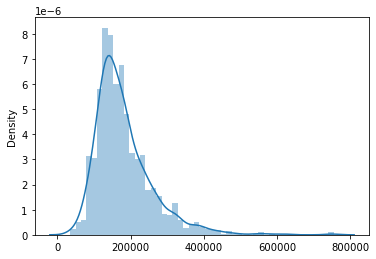

In [22]:
sns.distplot(x = df_train.SalePrice  ) 

<AxesSubplot:xlabel='SalePrice', ylabel='LotFrontage'>

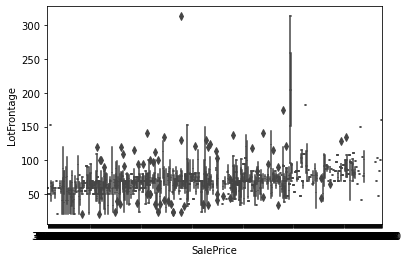

In [23]:
sns.boxplot(x = df_train.SalePrice, y = df_train.LotFrontage)

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

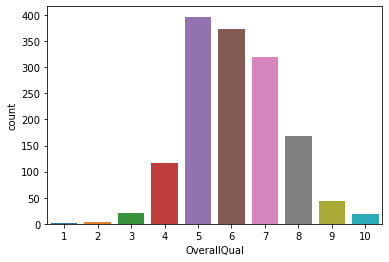

In [24]:
sns.countplot( df_train.OverallQual)

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

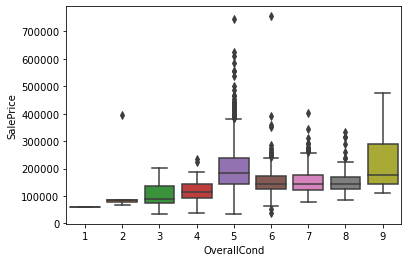

In [25]:
sns.boxplot(y =df_train.SalePrice ,x = df_train.OverallCond)

<AxesSubplot:xlabel='SalePrice', ylabel='YearBuilt'>

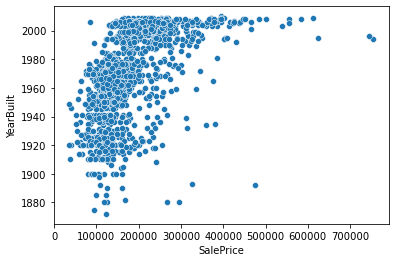

In [26]:
sns.scatterplot(x =df_train.SalePrice ,y = df_train.YearBuilt)

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

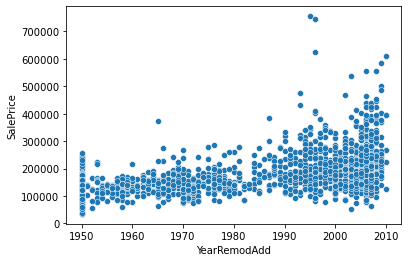

In [27]:
sns.scatterplot(y =df_train.SalePrice ,x = df_train.YearRemodAdd)

<AxesSubplot:xlabel='GrLivArea'>

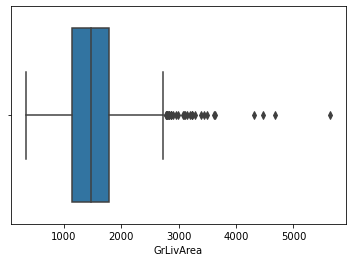

In [28]:
sns.boxplot(df_train.GrLivArea)

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

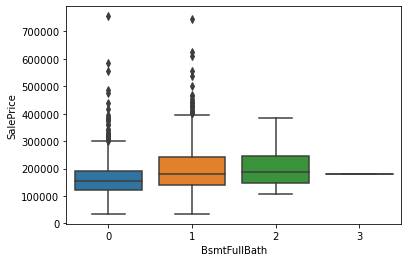

In [29]:
sns.boxplot(y =df_train.SalePrice ,x = df_train['BsmtFullBath'])

<AxesSubplot:xlabel='FullBath', ylabel='count'>

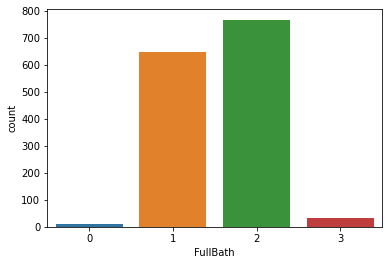

In [30]:
sns.countplot(df_train['FullBath'])

<AxesSubplot:xlabel='HalfBath', ylabel='count'>

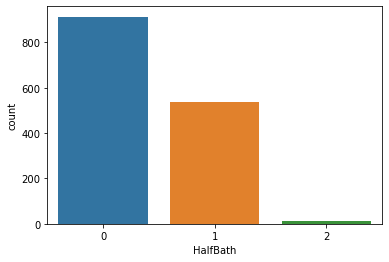

In [31]:
sns.countplot(df_train['HalfBath'])

<AxesSubplot:xlabel='BedroomAbvGr'>

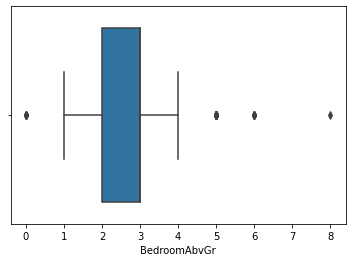

In [32]:
sns.boxplot(df_train['BedroomAbvGr'])

<AxesSubplot:xlabel='TotRmsAbvGrd'>

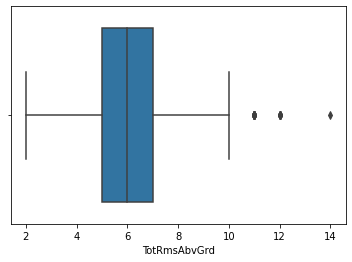

In [33]:
sns.boxplot(df_train['TotRmsAbvGrd'])

<AxesSubplot:xlabel='Fireplaces'>

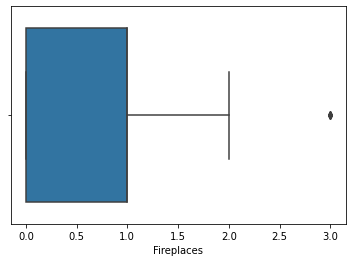

In [34]:
sns.boxplot(df_train['Fireplaces'])

<AxesSubplot:xlabel='GarageYrBlt'>

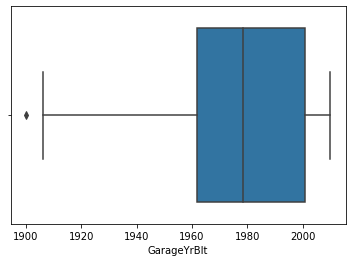

In [35]:
sns.boxplot(df_train['GarageYrBlt'])

<AxesSubplot:xlabel='GarageCars', ylabel='count'>

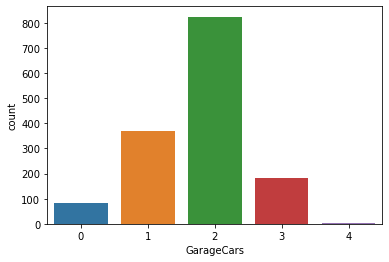

In [36]:
sns.countplot(df_train['GarageCars'])

<AxesSubplot:xlabel='GarageArea'>

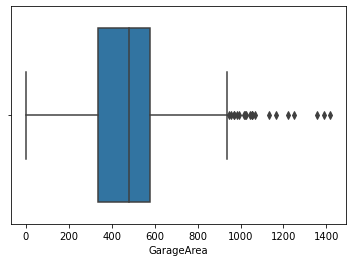

In [37]:
sns.boxplot(df_train['GarageArea'])

<AxesSubplot:xlabel='WoodDeckSF'>

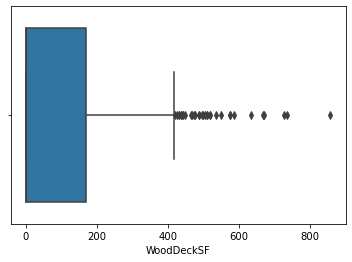

In [38]:
sns.boxplot(df_train['WoodDeckSF'])

<AxesSubplot:xlabel='OpenPorchSF'>

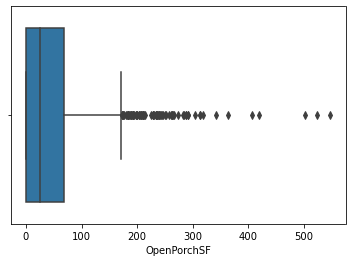

In [39]:
sns.boxplot(df_train['OpenPorchSF'])

<AxesSubplot:xlabel='MoSold', ylabel='count'>

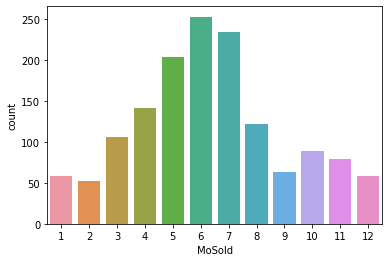

In [40]:
sns.countplot(df_train['MoSold'])

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

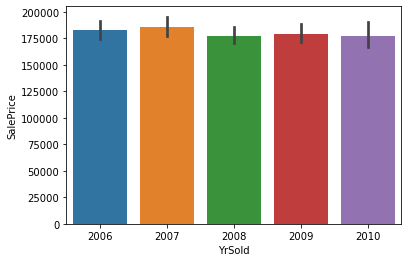

In [41]:
sns.barplot(x = df_train['YrSold'],y = df_train.SalePrice)

In [42]:
df_train.shape

(1460, 76)

In [43]:
df_train.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [44]:
df_test.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [45]:
df_train_1 = df_train.drop(columns = (['Utilities','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','Heating','Electrical','GarageQual']))

In [46]:
df_test_1 = df_test.drop(columns = (['Utilities','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','Heating','Electrical','GarageQual']))

In [47]:
dummied_train=pd.get_dummies(df_train_1, drop_first=True)

In [48]:
dummied_test=pd.get_dummies(df_test_1, drop_first=True)

In [49]:
dummied_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0


In [50]:
dummied_test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,0,1,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,0,1,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,0,1,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,0,1,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,0,1,0,0,0,1,0


In [51]:
X=dummied_train.drop(columns='SalePrice',axis=1)
Y=dummied_train['SalePrice']

In [52]:
#from sklearn.preprocessing import StandardScaler
#scalar = StandardScaler()
#X_scalar_fit = scalar.fit_transform(X)

In [53]:
#X_scalar_fit

In [54]:
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


In [55]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [56]:
# splitting the dataset into train and test data

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.33,random_state = 42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((978, 169), (482, 169), (978,), (482,))

In [57]:
y_train

615     137500
613     147000
1303    232000
486     156000
561     170000
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: SalePrice, Length: 978, dtype: int64

## LinearRegression Model

In [58]:
lm = LinearRegression()
lm_fit = lm.fit(x_train,y_train)

In [59]:
print('intercept_ : ',lm_fit.intercept_)
print(lm_fit.coef_)

intercept_ :  309590.92517909524
[-1.60207845e+00 -2.38929603e+02 -2.19540888e+02  6.57837916e-01
  8.50647940e+03  4.04331599e+03  7.65820565e+01  6.68567510e+01
  3.66795149e+00 -4.76299684e+00  7.79936468e+00 -1.29424751e+00
  1.74211411e+00 -1.37691994e+00 -4.93556120e+00  4.01509115e+01
  3.38384391e+01  8.30165775e+03 -5.21545677e+01  1.02242394e+04
  3.93364079e+03 -2.12354253e+03 -1.08063832e+04  3.98609037e+03
  5.97674992e+03 -5.84463178e+01  1.30846875e+04  8.53538261e+00
  2.01818196e+01 -6.39610408e+00  3.32731285e+01  6.56219301e+01
  7.78200735e+01 -1.12627385e+02 -4.17283607e+00 -6.32444395e+01
 -2.60660281e+02  3.71771916e+04  1.85213005e+04  2.25510871e+04
  2.63141023e+04  5.60023501e+04  8.60587038e+03 -1.18681842e+04
  2.08474384e+03  3.47615365e+04  1.34423266e+04  2.21215886e+04
  6.11063907e+03 -9.64327875e+03 -2.59804338e+04 -1.63664522e+03
  8.44685542e+03 -1.98556332e+04 -8.34872595e+03  5.89617870e+03
 -5.29909826e+03 -7.55742100e+03 -2.86657065e+03  1.09447

In [60]:
y_pred_lm = lm_fit.predict(x_test)


In [61]:
# loocking for y_test data predicted data and y_test - predicted data

for i in range(y_test.shape[0]):
    print('y_test :',list(y_test)[i],'|***|','y_pred_lm :',(y_pred_lm)[i],'|***|','y_test - y_pred_lm :',list(y_test)[i]-y_pred_lm[i])

y_test : 154500 |***| y_pred_lm : 151780.86044297312 |***| y_test - y_pred_lm : 2719.1395570268796
y_test : 325000 |***| y_pred_lm : 337270.7558770278 |***| y_test - y_pred_lm : -12270.755877027812
y_test : 115000 |***| y_pred_lm : 117335.94475262327 |***| y_test - y_pred_lm : -2335.944752623269
y_test : 159000 |***| y_pred_lm : 190251.48695294285 |***| y_test - y_pred_lm : -31251.486952942854
y_test : 315500 |***| y_pred_lm : 336790.32207710174 |***| y_test - y_pred_lm : -21290.322077101737
y_test : 75500 |***| y_pred_lm : 73621.73657295469 |***| y_test - y_pred_lm : 1878.2634270453127
y_test : 311500 |***| y_pred_lm : 249496.78975481214 |***| y_test - y_pred_lm : 62003.21024518786
y_test : 146000 |***| y_pred_lm : 151779.4581737968 |***| y_test - y_pred_lm : -5779.4581737967965
y_test : 84500 |***| y_pred_lm : 57674.75372955727 |***| y_test - y_pred_lm : 26825.24627044273
y_test : 135500 |***| y_pred_lm : 147190.01252435544 |***| y_test - y_pred_lm : -11690.012524355436
y_test : 1450

y_test : 129900 |***| y_pred_lm : 143023.27777483134 |***| y_test - y_pred_lm : -13123.277774831338
y_test : 115000 |***| y_pred_lm : 97479.62278879993 |***| y_test - y_pred_lm : 17520.377211200073
y_test : 192140 |***| y_pred_lm : 162994.0885123673 |***| y_test - y_pred_lm : 29145.911487632693
y_test : 160000 |***| y_pred_lm : 163119.9295471938 |***| y_test - y_pred_lm : -3119.9295471938094
y_test : 145000 |***| y_pred_lm : 146053.7243723586 |***| y_test - y_pred_lm : -1053.7243723586143
y_test : 86000 |***| y_pred_lm : 97440.91850945543 |***| y_test - y_pred_lm : -11440.918509455427
y_test : 158000 |***| y_pred_lm : 145879.47727672226 |***| y_test - y_pred_lm : 12120.52272327774
y_test : 127500 |***| y_pred_lm : 144799.98915552092 |***| y_test - y_pred_lm : -17299.989155520918
y_test : 115000 |***| y_pred_lm : 94218.1982770462 |***| y_test - y_pred_lm : 20781.801722953795
y_test : 119500 |***| y_pred_lm : 120801.51416419676 |***| y_test - y_pred_lm : -1301.5141641967639
y_test : 1759

In [62]:
#Linear Regression model metrics

mse = mean_squared_error (y_test, y_pred_lm)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_lm))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')
print ("training set score :", lm_fit.score(x_train, y_train))
print ("test set score :", lm_fit.score(x_test,y_test))
print('=======================================')

R2 Score : 0.831698560459678
RMSE : 35150.629215088615
mse : 1235566734.2166414
training set score : 0.8980745243844303
test set score : 0.831698560459678


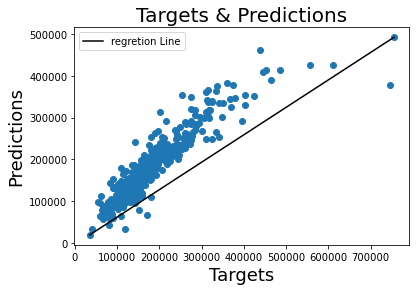

In [63]:
# Plot Targets & Predictions

plt.scatter(y_test, y_pred_lm)
plt.plot([y_test.min(),y_test.max()],[y_pred_lm.min(),y_pred_lm.max()], color = 'black', label = 'regretion Line' )
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.title('Targets & Predictions',size=20)
plt.legend()
plt.show()

## LassoRegression Model

In [64]:
lassoR = Lasso(alpha=1)
lassoR_fit = lassoR.fit(x_train, y_train)

In [65]:
y_pred_lasso = lassoR_fit.predict(x_test)

In [66]:
for i in range(y_test.shape[0]):
    print('y_test :',list(y_test)[i],'y_pred_lasso :',(y_pred_lasso)[i],'y_test - y_pred_lasso :',list(y_test)[i]-y_pred_lasso[i])

y_test : 154500 y_pred_lasso : 151977.63156207275 y_test - y_pred_lasso : 2522.3684379272454
y_test : 325000 y_pred_lasso : 337227.62914838234 y_test - y_pred_lasso : -12227.629148382344
y_test : 115000 y_pred_lasso : 117125.83973199298 y_test - y_pred_lasso : -2125.839731992979
y_test : 159000 y_pred_lasso : 190044.3430203391 y_test - y_pred_lasso : -31044.34302033909
y_test : 315500 y_pred_lasso : 336674.59969759366 y_test - y_pred_lasso : -21174.599697593658
y_test : 75500 y_pred_lasso : 73467.0346054644 y_test - y_pred_lasso : 2032.9653945355967
y_test : 311500 y_pred_lasso : 249428.95012278453 y_test - y_pred_lasso : 62071.04987721547
y_test : 146000 y_pred_lasso : 151440.7587333124 y_test - y_pred_lasso : -5440.758733312396
y_test : 84500 y_pred_lasso : 57484.37600868562 y_test - y_pred_lasso : 27015.62399131438
y_test : 135500 y_pred_lasso : 147285.3133037723 y_test - y_pred_lasso : -11785.313303772302
y_test : 145000 y_pred_lasso : 148006.4699421675 y_test - y_pred_lasso : -300

y_test : 248000 y_pred_lasso : 276598.76558057993 y_test - y_pred_lasso : -28598.76558057993
y_test : 124000 y_pred_lasso : 128524.5391184625 y_test - y_pred_lasso : -4524.539118462504
y_test : 191000 y_pred_lasso : 175371.09754002333 y_test - y_pred_lasso : 15628.90245997667
y_test : 181000 y_pred_lasso : 109799.62921061827 y_test - y_pred_lasso : 71200.37078938173
y_test : 105000 y_pred_lasso : 105341.45579023645 y_test - y_pred_lasso : -341.4557902364468
y_test : 139900 y_pred_lasso : 110666.35256845556 y_test - y_pred_lasso : 29233.647431544436
y_test : 157900 y_pred_lasso : 149263.8529116848 y_test - y_pred_lasso : 8636.147088315192
y_test : 130500 y_pred_lasso : 110692.27361861893 y_test - y_pred_lasso : 19807.72638138107
y_test : 172400 y_pred_lasso : 175330.22682512522 y_test - y_pred_lasso : -2930.2268251252244
y_test : 130000 y_pred_lasso : 102876.92626603344 y_test - y_pred_lasso : 27123.073733966565
y_test : 178000 y_pred_lasso : 208639.6417698947 y_test - y_pred_lasso : -3

In [67]:
#Lasso Regression model metrics

mse = mean_squared_error (y_test, y_pred_lasso)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_lasso))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')

print ("training set score :", lassoR_fit.score(x_train, y_train))
print ("test set score :", lassoR_fit.score(x_test,y_test))
print('=======================================')

R2 Score : 0.8322487822541007
RMSE : 35093.123837707244
mse : 1231527340.6886563
training set score : 0.8980627943155526
test set score : 0.8322487822541007


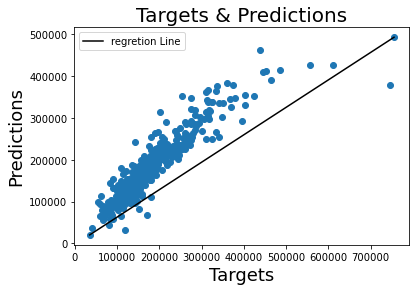

In [68]:
# Plot Targets & Predictions

plt.scatter(y_test, y_pred_lasso)
plt.plot([y_test.min(),y_test.max()],[y_pred_lasso.min(),y_pred_lasso.max()], color = 'black', label = 'regretion Line' )
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.title('Targets & Predictions',size=20)
plt.legend()
plt.show()

## Random Forest Regressor Model

In [69]:
#Random Forest Regressor mODEL
random_reg = RandomForestRegressor(n_estimators=100,random_state=0)
#Random Forest Regressor Model Fitting
random_reg_fit = random_reg.fit(x_train,y_train)

In [70]:
y_pred_random = random_reg_fit.predict(x_test)

In [71]:
for i in range(y_test.shape[0]):
    print('y_test :',list(y_test)[i],'y_pred_random :',(y_pred_random)[i],'y_test - y_pred_random :',list(y_test)[i]-y_pred_random[i])

y_test : 154500 y_pred_random : 141134.0 y_test - y_pred_random : 13366.0
y_test : 325000 y_pred_random : 314019.77 y_test - y_pred_random : 10980.229999999981
y_test : 115000 y_pred_random : 115146.1 y_test - y_pred_random : -146.10000000000582
y_test : 159000 y_pred_random : 151535.5 y_test - y_pred_random : 7464.5
y_test : 315500 y_pred_random : 320851.47 y_test - y_pred_random : -5351.469999999972
y_test : 75500 y_pred_random : 82640.0 y_test - y_pred_random : -7140.0
y_test : 311500 y_pred_random : 206332.85 y_test - y_pred_random : 105167.15
y_test : 146000 y_pred_random : 151730.37 y_test - y_pred_random : -5730.369999999995
y_test : 84500 y_pred_random : 82969.0 y_test - y_pred_random : 1531.0
y_test : 135500 y_pred_random : 130445.75 y_test - y_pred_random : 5054.25
y_test : 145000 y_pred_random : 157861.55 y_test - y_pred_random : -12861.549999999988
y_test : 130000 y_pred_random : 120601.0 y_test - y_pred_random : 9399.0
y_test : 81000 y_pred_random : 105804.64 y_test - y_pr

y_test : 216000 y_pred_random : 203063.13 y_test - y_pred_random : 12936.869999999995
y_test : 350000 y_pred_random : 349786.86 y_test - y_pred_random : 213.14000000001397
y_test : 195000 y_pred_random : 186517.2 y_test - y_pred_random : 8482.799999999988
y_test : 120000 y_pred_random : 126959.5 y_test - y_pred_random : -6959.5
y_test : 228500 y_pred_random : 267296.74 y_test - y_pred_random : -38796.73999999999
y_test : 248000 y_pred_random : 226377.37 y_test - y_pred_random : 21622.630000000005
y_test : 124000 y_pred_random : 135566.25 y_test - y_pred_random : -11566.25
y_test : 191000 y_pred_random : 198111.16 y_test - y_pred_random : -7111.1600000000035
y_test : 181000 y_pred_random : 162241.5 y_test - y_pred_random : 18758.5
y_test : 105000 y_pred_random : 109375.5 y_test - y_pred_random : -4375.5
y_test : 139900 y_pred_random : 140520.48 y_test - y_pred_random : -620.4800000000105
y_test : 157900 y_pred_random : 149560.5 y_test - y_pred_random : 8339.5
y_test : 130500 y_pred_rand

In [72]:
#Random Forest Regression model metrics
mse = mean_squared_error (y_test, y_pred_random)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_random))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')

print ("training set score :", random_reg.score(x_train, y_train))
print ("test set score :", random_reg.score(x_test,y_test))
print('=======================================')

R2 Score : 0.869804116303287
RMSE : 30916.321510745514
mse : 955818935.7557858
training set score : 0.979544155498982
test set score : 0.869804116303287


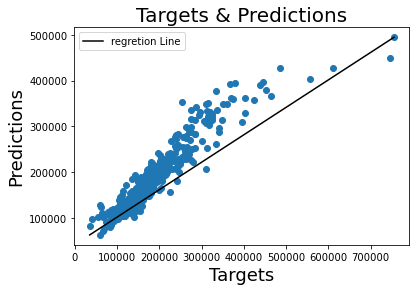

In [73]:
# Plot Targets & Predictions

plt.scatter(y_test, y_pred_random)
plt.plot([y_test.min(),y_test.max()],[y_pred_random.min(),y_pred_random.max()], color = 'black', label = 'regretion Line' )
plt.xlabel('Targets',size=18)
plt.ylabel('Predictions',size=18)
plt.title('Targets & Predictions',size=20)
plt.legend()
plt.show()

## Gradient Boosting Regressor

In [74]:
gbr = GradientBoostingRegressor(random_state=101)
gbr_fit = gbr.fit(x_train,y_train)

In [75]:
y_pred_gbr= gbr_fit.predict(x_test)

In [76]:
for i in range(y_test.shape[0]):
    print('y_test :',list(y_test)[i],'y_pred_gbr :',(y_pred_gbr)[i],'y_test - y_pred_gbr :',list(y_test)[i]-y_pred_gbr[i])

y_test : 154500 y_pred_gbr : 146186.22571602874 y_test - y_pred_gbr : 8313.77428397126
y_test : 325000 y_pred_gbr : 326026.5698934331 y_test - y_pred_gbr : -1026.5698934330721
y_test : 115000 y_pred_gbr : 123297.82942042736 y_test - y_pred_gbr : -8297.829420427355
y_test : 159000 y_pred_gbr : 144297.41287549518 y_test - y_pred_gbr : 14702.587124504818
y_test : 315500 y_pred_gbr : 324822.5295704321 y_test - y_pred_gbr : -9322.529570432089
y_test : 75500 y_pred_gbr : 79090.14202351202 y_test - y_pred_gbr : -3590.1420235120167
y_test : 311500 y_pred_gbr : 222169.4198027534 y_test - y_pred_gbr : 89330.5801972466
y_test : 146000 y_pred_gbr : 142616.43425754545 y_test - y_pred_gbr : 3383.5657424545498
y_test : 84500 y_pred_gbr : 79090.14202351202 y_test - y_pred_gbr : 5409.857976487983
y_test : 135500 y_pred_gbr : 137454.79598464546 y_test - y_pred_gbr : -1954.7959846454614
y_test : 145000 y_pred_gbr : 158380.73461428483 y_test - y_pred_gbr : -13380.734614284826
y_test : 130000 y_pred_gbr : 

y_test : 139900 y_pred_gbr : 125056.938600704 y_test - y_pred_gbr : 14843.061399295999
y_test : 157900 y_pred_gbr : 152432.1259912762 y_test - y_pred_gbr : 5467.874008723797
y_test : 130500 y_pred_gbr : 123263.84620430072 y_test - y_pred_gbr : 7236.153795699283
y_test : 172400 y_pred_gbr : 174567.79049823966 y_test - y_pred_gbr : -2167.7904982396576
y_test : 130000 y_pred_gbr : 123821.05809447849 y_test - y_pred_gbr : 6178.941905521511
y_test : 178000 y_pred_gbr : 200164.59235711404 y_test - y_pred_gbr : -22164.592357114045
y_test : 161500 y_pred_gbr : 147499.02769734408 y_test - y_pred_gbr : 14000.972302655922
y_test : 119900 y_pred_gbr : 130372.44756817824 y_test - y_pred_gbr : -10472.447568178235
y_test : 239000 y_pred_gbr : 200876.32755628126 y_test - y_pred_gbr : 38123.67244371874
y_test : 190000 y_pred_gbr : 197553.00767941363 y_test - y_pred_gbr : -7553.007679413626
y_test : 85400 y_pred_gbr : 99998.57416340722 y_test - y_pred_gbr : -14598.574163407218
y_test : 205000 y_pred_gbr

In [77]:
#Gradient Boosting Regressor model metrics
mse = mean_squared_error (y_test, y_pred_gbr)

rmse = np.sqrt(mse)

print('=======================================')
print ("R2 Score :" , r2_score(y_test,y_pred_gbr))
print('=======================================')
print ("RMSE :", rmse)
print('=======================================')
print ("mse :", mse)

print('=======================================')

print ("training set score :", gbr.score(x_train, y_train))
print ("test set score :", gbr.score(x_test,y_test))
print('=======================================')

R2 Score : 0.8645686466019491
RMSE : 31531.802482411837
mse : 994254567.7898332
training set score : 0.9688574770535183
test set score : 0.8645686466019491


In [78]:
Models_ = pd.DataFrame({'SCORS' : ['R2 Score','training set score','test set score'],
           "Regression MODEL":[0.7292287496987853,0.9179703966287276,0.7292287496987853] ,
           "Lasso Regression":[0.7307017229767745,0.9179494582144702,0.7307017229767745] ,
           "Random Forest" : [0.8376199778012476,0.9802889247677912,0.8376199778012476],
           "GradientBoosting " : [0.8623559440183644,0.9615217445449972,0.8623559440183644]    })

In [79]:
Models_

,SCORS,Regression MODEL,Lasso Regression,Random Forest,GradientBoosting
0,R2 Score,0.729229,0.730702,0.837620,0.862356
1,training set score,0.917970,0.917949,0.980289,0.961522
2,test set score,0.729229,0.730702,0.837620,0.862356


#### Random Forest MODEL is Perform Better Than other model because its R2 Score,training set score,test set score score are better than other models.

In [80]:
#diuysfs76df6878787687af87a8ifga8i7sf

In [81]:
predictions = gbr_fit.predict(dummied_test)

In [82]:
predictions

array([123157.53625328, 156926.31452672, 181446.49322235, ...,
       174685.44102261, 129905.0533085 , 248519.79269801])

In [84]:
submission = pd.DataFrame()
submission['ID'] = df_test['Id']
submission['SalePrice'] = predictions

In [85]:
submission.shape

(1459, 2)

In [86]:
submission.to_csv('Housing_price_Predicted_GBR1.csv')

In [87]:
abcd = pd.read_csv('Housing_price_Predicted_GBR1.csv')

In [88]:
abcd.shape

(1459, 3)